**Problem Statement**

"Predicting Loan Approval for Applicants"

Financial institutions face challenges in assessing loan applications due to various factors, such as applicants' demographic details, financial profiles, and credit history. Accurate prediction of loan approval can help minimize default risks and improve the decision-making process.

The problem involves understanding how these factors influence loan approval and developing a model that can generalize well to unseen applications, ensuring fairness and reducing risks for lenders.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

i am imported some key libraries and modules for data manipulation, visualization, and machine learning.

In [ ]:
data=pd.read_csv('/content/loan_data.csv')
df=pd.DataFrame(data)
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


This approach is common in exploratory data analysis (EDA), where the dataset is first loaded into memory, and the DataFrame


# **Dataset Summary**  

The dataset contains 45,000 records with 14 attributes. Below is a description of each column:


person_age: Age of the individual (float).

person_gender: Gender of the individual (categorical: "male", "female").

person_education: Education level (e.g., "Master", "High School", "Bachelor").

person_income: Annual income of the person (float).

person_emp_exp: Years of employment experience (integer).

person_home_ownership: Type of home ownership (categorical: "RENT", "OWN", "MORTGAGE").

loan_amnt: Amount of the loan applied for (float).

loan_intent: Purpose of the loan (e.g., "PERSONAL", "EDUCATION", "MEDICAL").

loan_int_rate: Interest rate for the loan (float).

loan_percent_income: Loan amount as a percentage of the borrower's income (float).

cb_person_cred_hist_length: Length of the credit history (years, float).

credit_score: Credit score of the individual (integer).

previous_loan_defaults_on_file: Indicates if there are defaults on file (categorical: "Yes", "No").

loan_status: Target variable indicating loan approval status (1 = Approved, 0 = Rejected).

# Objectives


This project aims to build a predictive model to determine whether a loan application will be approved based on the provided dataset, which contains key features like the applicant's age, income, education, homeownership, employment experience, credit score, and loan details.

# **Understanding the Data**

In [ ]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


A DataFrame (df) in Python, specifically in the pandas library, is a two-dimensional labeled data structure. It is similar to a table in a database or an Excel spreadsheet, where data is organized in rows and columns.

In your dataset:

Rows: Each row represents a single record, in this case, a loan application.

Columns: Each column represents a specific feature or variable about the loan application (e.g., age, income, loan amount).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

summeries of the Data Set

In [ ]:
df.duplicated().sum()

0

Check the duplicates value include the Data Set

In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


The describe of the Data set


In [ ]:
df.shape

(45000, 14)

identify the shape of the dataset

In [ ]:
df.value_counts()

person_age  person_gender  person_education  person_income  person_emp_exp  person_home_ownership  loan_amnt  loan_intent  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  credit_score  previous_loan_defaults_on_file  loan_status
20.0        female         Associate         42674.0        0               RENT                   7000.0     MEDICAL      13.61          0.16                 2.0                         636           Yes                             0              1
29.0        female         Associate         53840.0        7               MORTGAGE               24000.0    MEDICAL      6.91           0.45                 8.0                         680           Yes                             0              1
                                             51488.0        7               RENT                   1600.0     VENTURE      19.16          0.03                 6.0                         526           Yes                             0              1
                                             51643.0        8               RENT                   15000.0    PERSONAL     14.25          0.29                 9.0                         511           No                              1              1
                                             52465.0        4               RENT                   1200.0     MEDICAL      11.43          0.02                 6.0                         656           Yes                             0              1
                                                                                                                                                                                                                                                       ..
24.0        male           High School       60838.0        0               RENT                   15000.0    MEDICAL      6.92           0.25                 3.0                         558           Yes                             0              1
                                                            5               RENT                   8000.0     EDUCATION    7.96           0.13                 4.0                         560           Yes                             0              1
                                             60860.0        0               RENT                   8000.0     PERSONAL     15.39          0.13                 3.0                         612           Yes                             0              1
                                             60883.0        1               MORTGAGE               3000.0     EDUCATION    7.66           0.05                 2.0                         638           Yes                             0              1
144.0       male           Bachelor          300616.0       125             RENT                   4800.0     VENTURE      13.57          0.02                 3.0                         789           No                              0              1
Name: count, Length: 45000, dtype: int64

check the inside dataset count values

In [ ]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [ ]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [ ]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [ ]:
df['person_gender'].unique()

array(['female', 'male'], dtype=object)

identify the column wised in the Dataset

# Data Cleaning

In [ ]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
ordinal_mapping = {'High School': 1, 'Bachelor': 2, 'Master': 3, 'Associate':4, 'Doctorate':5}
df['person_education'] = df['person_education'].map(ordinal_mapping)

ordinal_mapping = {'Yes': 1, 'No': 0}
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map(ordinal_mapping)

ordinal_mapping = {'EDUCATION': 1, 'MEDICAL': 2, 'PERSONAL': 3, 'VENTURE':4, 'HOMEIMPROVEMENT':5,'DEBTCONSOLIDATION':6}
df['loan_intent'] = df['loan_intent'].map(ordinal_mapping)

ordinal_mapping = {'RENT': 1, 'OWN': 2, 'MORTGAGE': 3,'OTHER':4}
df['person_home_ownership'] = df['person_home_ownership'].map(ordinal_mapping)

#ordinal_mapping = {'Approved': 1, 'Rejected': 0}
#df['loan_status'] = df['loan_status'].map(ordinal_mapping)

ordinal_mapping = {'male': 1, 'female': 0}
df['person_gender'] = df['person_gender'].map(ordinal_mapping)

convert the obj to int

In [ ]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,3,71948.0,0,1,35000.0,3,16.02,0.49,3.0,561,0,1
1,21.0,0,1,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,1,12438.0,3,3,5500.0,2,12.87,0.44,3.0,635,0,1
3,23.0,0,2,79753.0,0,1,35000.0,2,15.23,0.44,2.0,675,0,1
4,24.0,1,3,66135.0,1,1,35000.0,2,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,4,47971.0,6,1,15000.0,2,15.66,0.31,3.0,645,0,1
44996,37.0,0,4,65800.0,17,1,9000.0,5,14.07,0.14,11.0,621,0,1
44997,33.0,1,4,56942.0,7,1,2771.0,6,10.02,0.05,10.0,668,0,1
44998,29.0,1,2,33164.0,4,1,12000.0,1,13.23,0.36,6.0,604,0,1


In [ ]:
"""import pandas as pd
from imblearn.under_sampling import RandomUnderSampler,NearMiss

# Assuming 'df' is your DataFrame with 'target_column' as the target variable
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Create an undersampler object
rus = NearMiss()

# Apply the undersampler to the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df = pd.concat([X_resampled, y_resampled], axis=1)"""

"import pandas as pd\nfrom imblearn.under_sampling import RandomUnderSampler,NearMiss\n\n# Assuming 'df' is your DataFrame with 'target_column' as the target variable\nX = df.drop('loan_status', axis=1)\ny = df['loan_status']\n\n# Create an undersampler object\nrus = NearMiss()\n\n# Apply the undersampler to the data\nX_resampled, y_resampled = rus.fit_resample(X, y)\n\n# Create a new DataFrame with the resampled data\ndf = pd.concat([X_resampled, y_resampled], axis=1)"

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
import pandas as pd

# Assuming 'df' is your DataFrame with 'loan_status' as the target variable
X = df.drop('loan_status', axis=1)  # Features
y = df['loan_status']  # Target

# Create an oversampler object (choose either RandomOverSampler or SMOTE)
# Uncomment the one you wish to use:
#ros = RandomOverSampler()  # For Random Oversampling
ros = SMOTE()  # For Synthetic Minority Oversampling

# Apply the oversampler to the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new DataFrame with the resampled data
# Ensure X_resampled is a DataFrame and y_resampled is Series to allow concatenation
X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name='loan_status')

df = pd.concat([X_resampled, y_resampled], axis=1)

sampling the dataset
using the oversampling method
using function also SMOTE()

In [ ]:
df['loan_status'].value_counts()

,count
loan_status,
1,35000
0,35000


LOOK THE VALUE COUNT

check the loan_status value count

In [ ]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


check the null values

# **Visualisation**

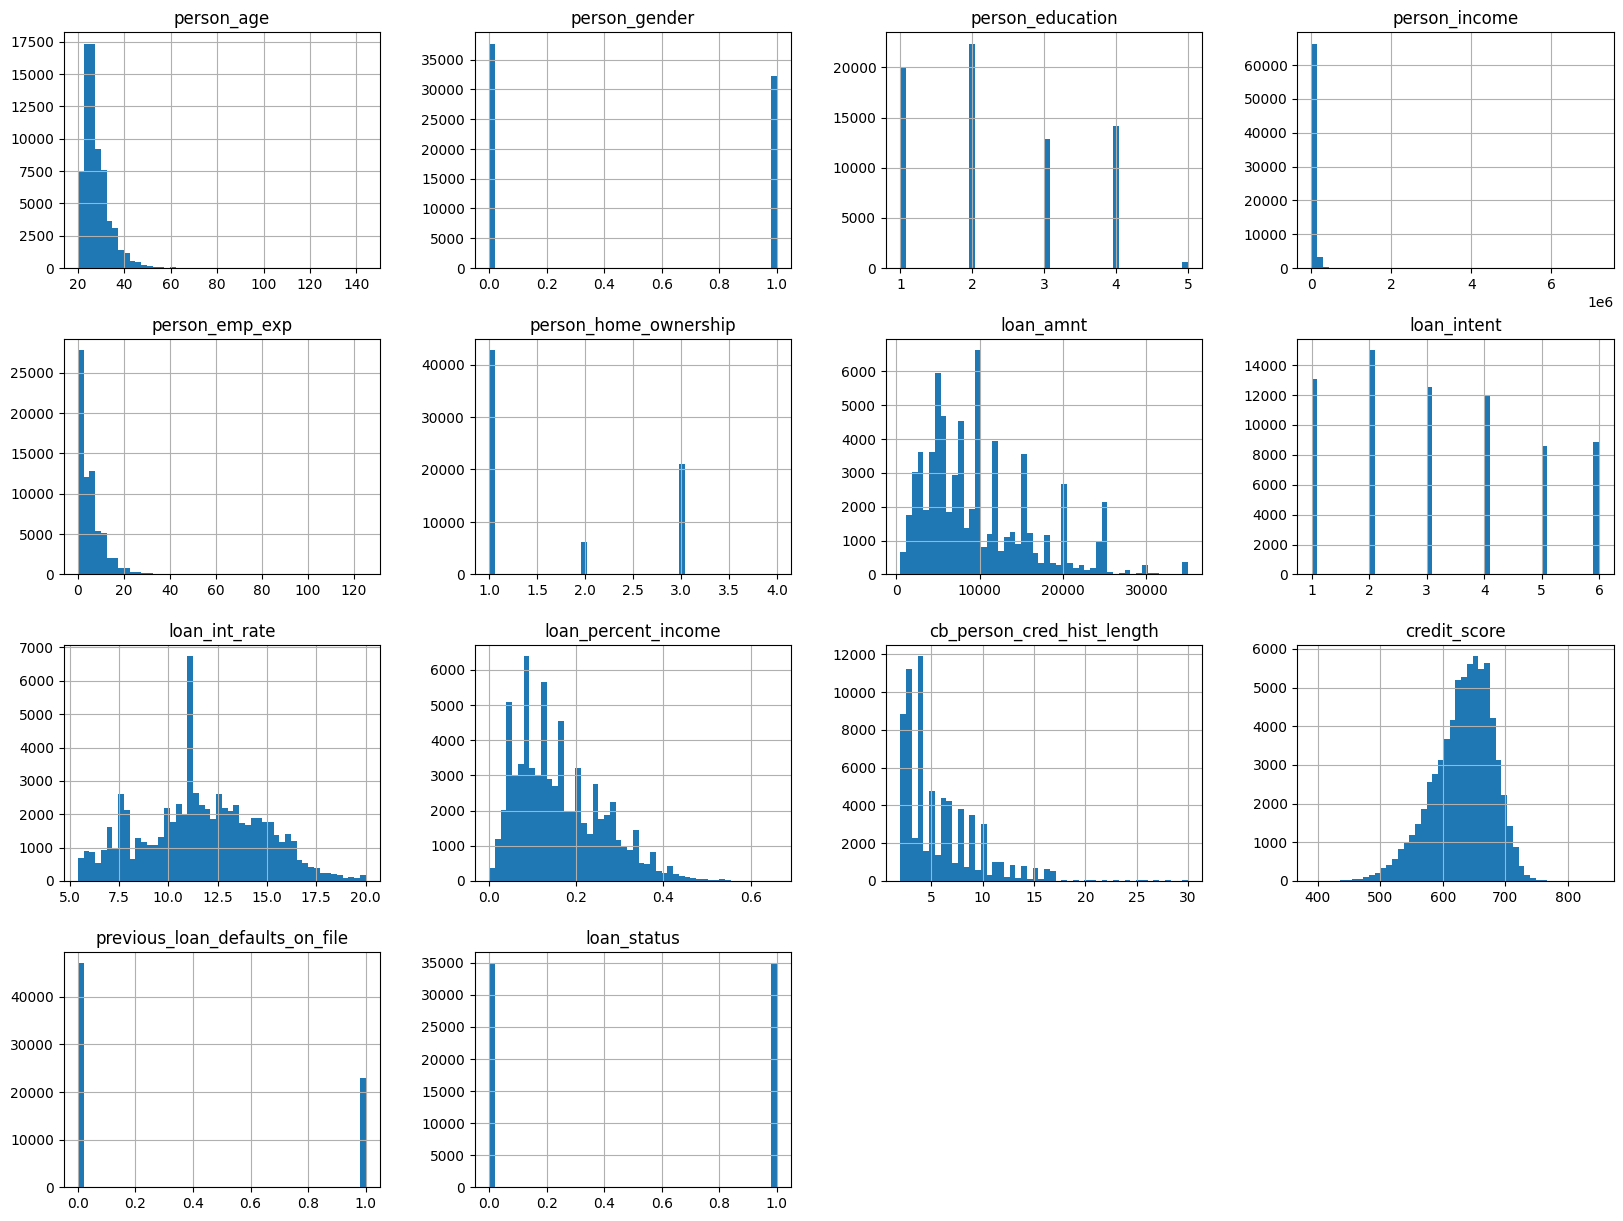

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

CHECK THE VISUALISATION THEN UNDERSTANDING THE INCLUDING SKEWNESS ANF NORMAL DISTRIBUTION

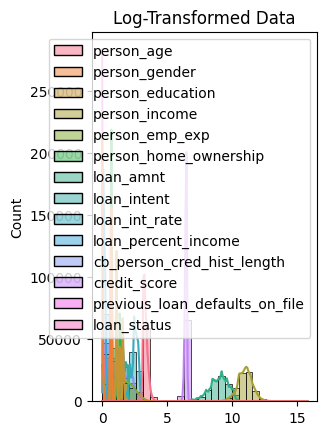

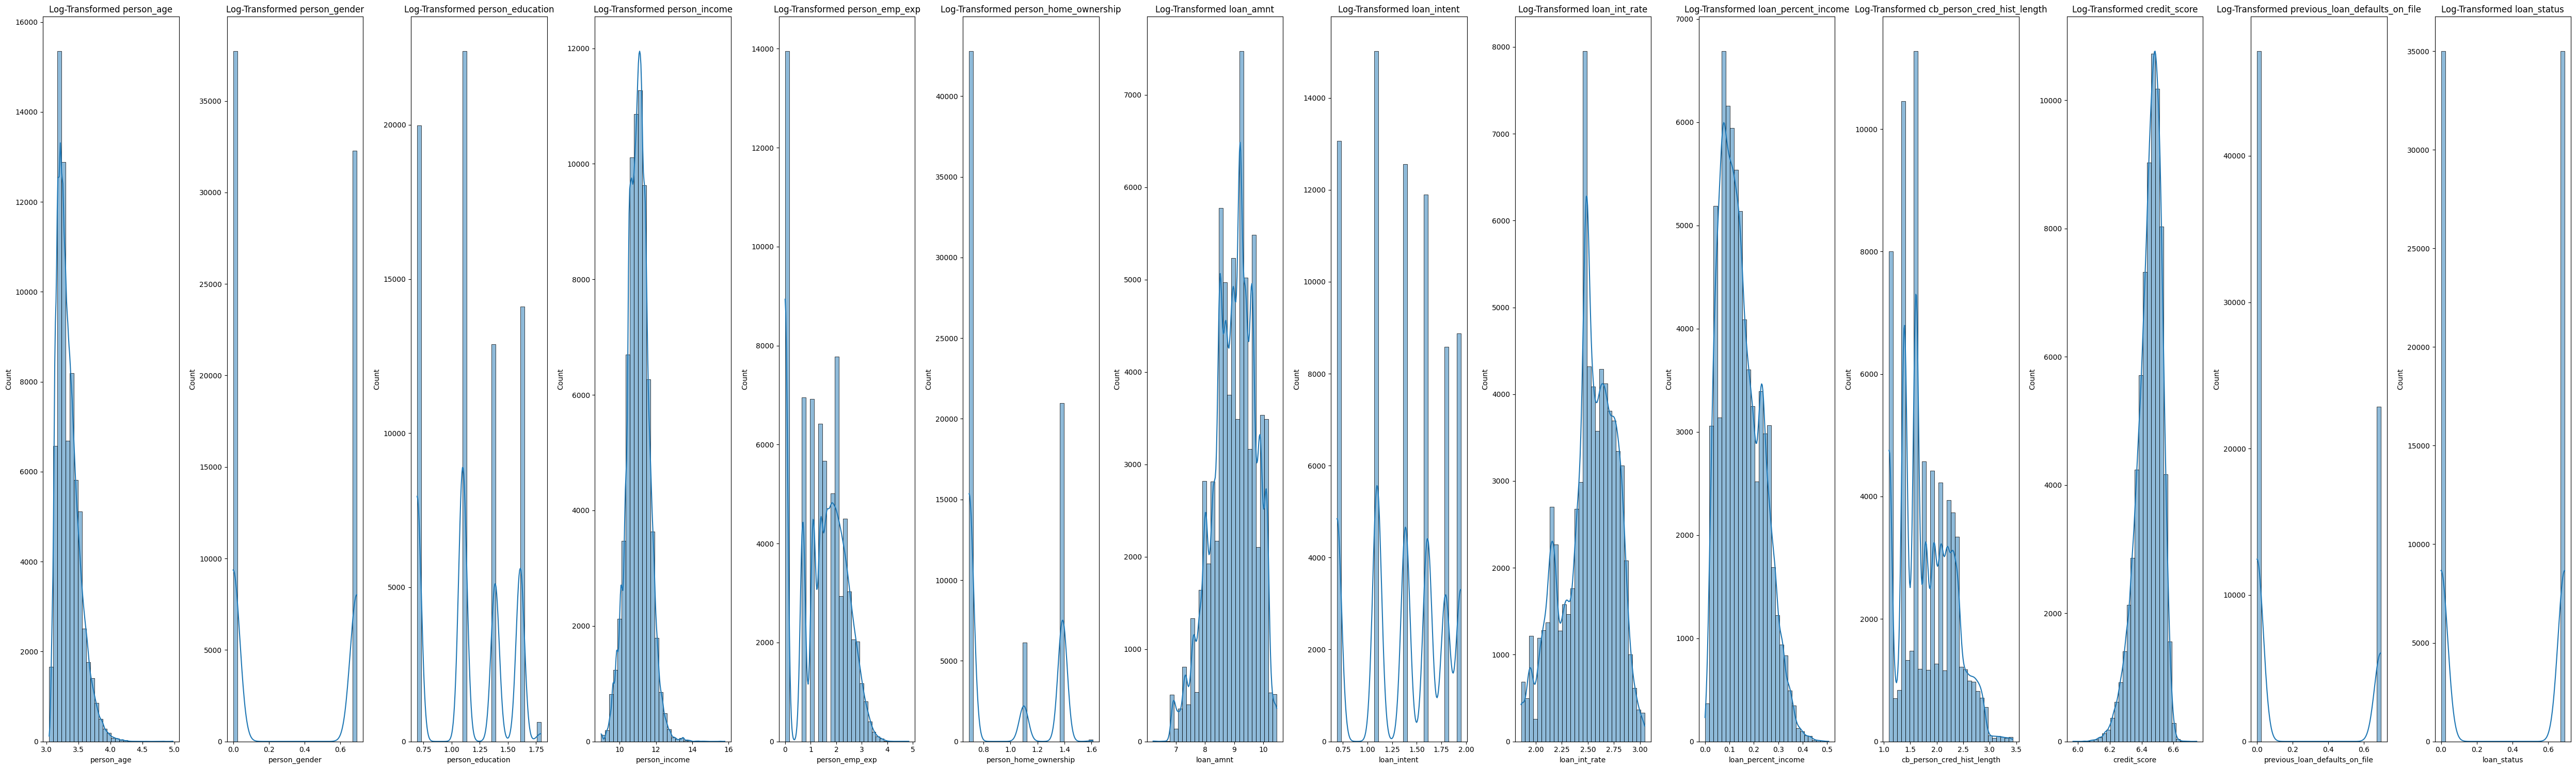

In [ ]:
#To handle skewness
import numpy as np
log_data = np.log(df + 1)  # Adding 1 to avoid log(0)

# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

handling the skewness

<Axes: >

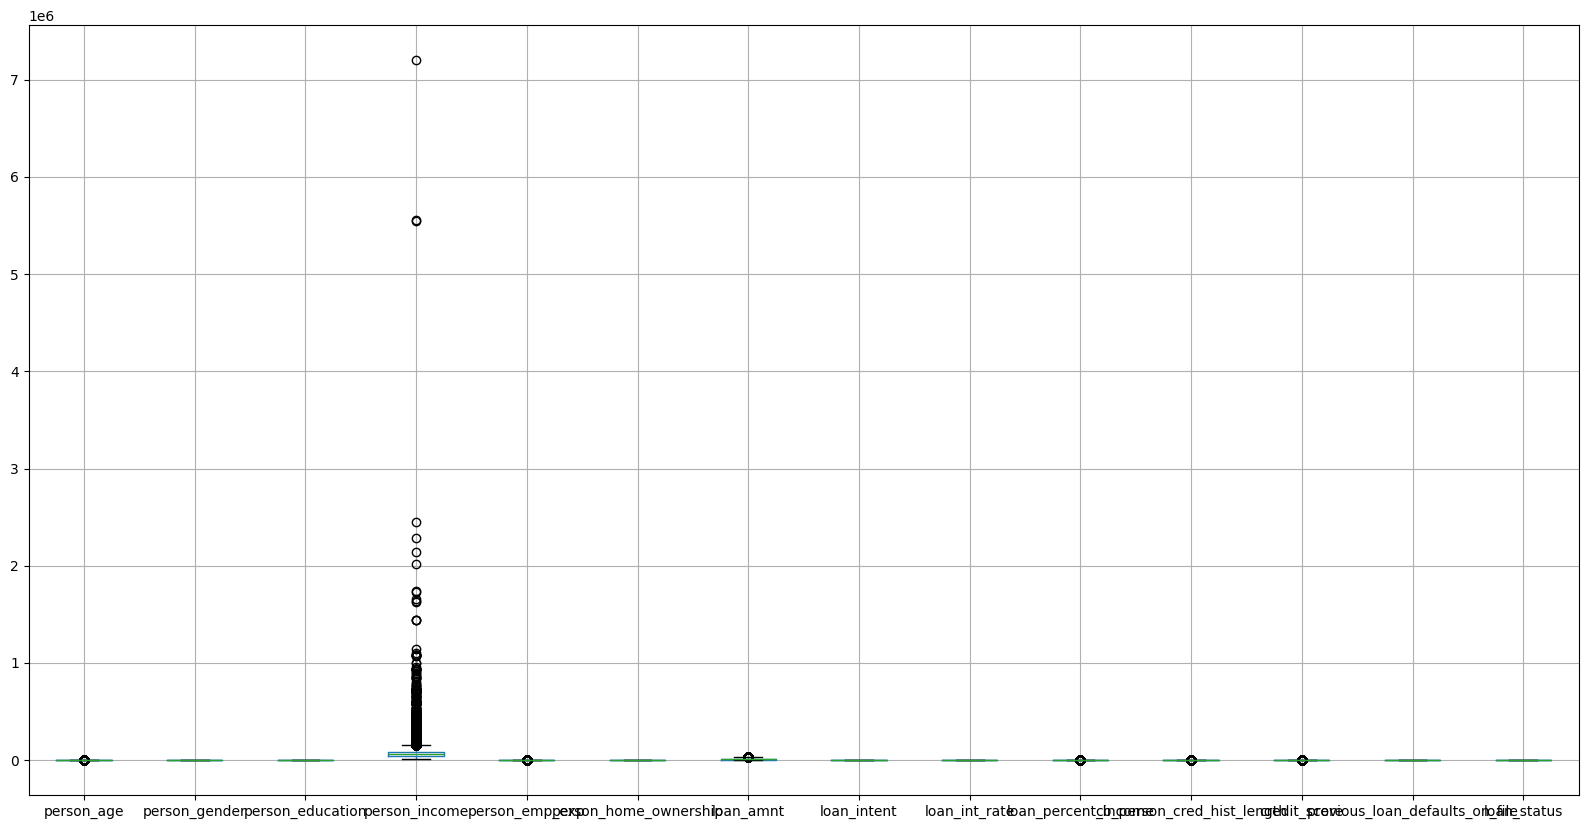

In [ ]:
plt.figure(figsize=(20,10))
df.boxplot()


view the boxplot

In [ ]:
def remove_outliers_iqr(df1, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5  * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers from the DataFrame
    df1_filtered = df[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]
    return df1_filtered

list1=df.columns.tolist()
list1.remove('loan_status')

for i in list1:
    df1 = remove_outliers_iqr(df, i)

remove the outliers

<Axes: >

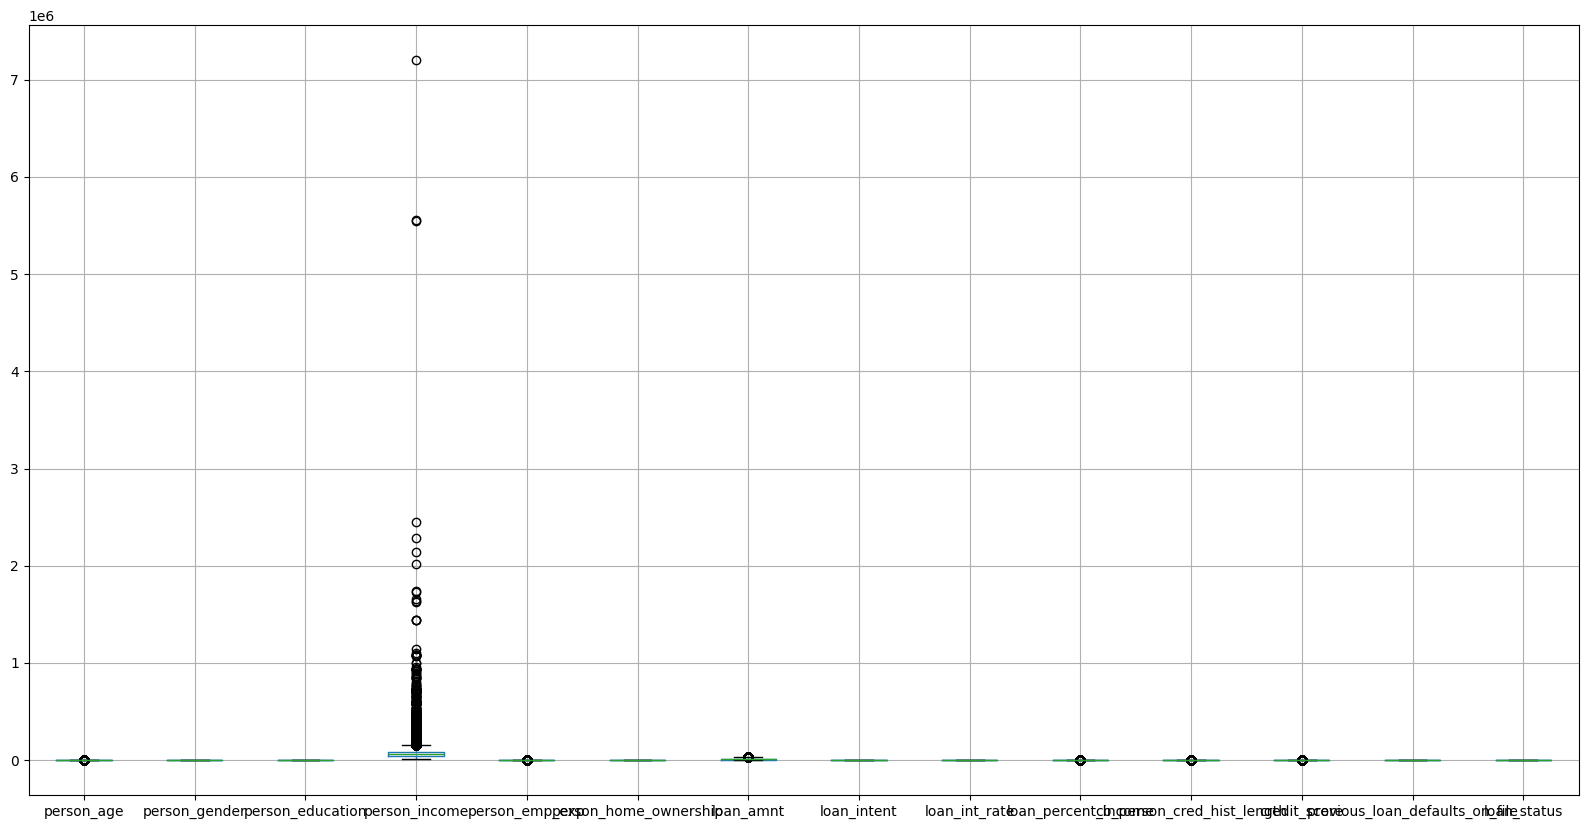

In [ ]:
plt.figure(figsize=(20,10))
df.boxplot()

after viewing boxplot the removing outliers

# Correlation

In [ ]:
x=df.corr()

Heatmap

<Axes: >

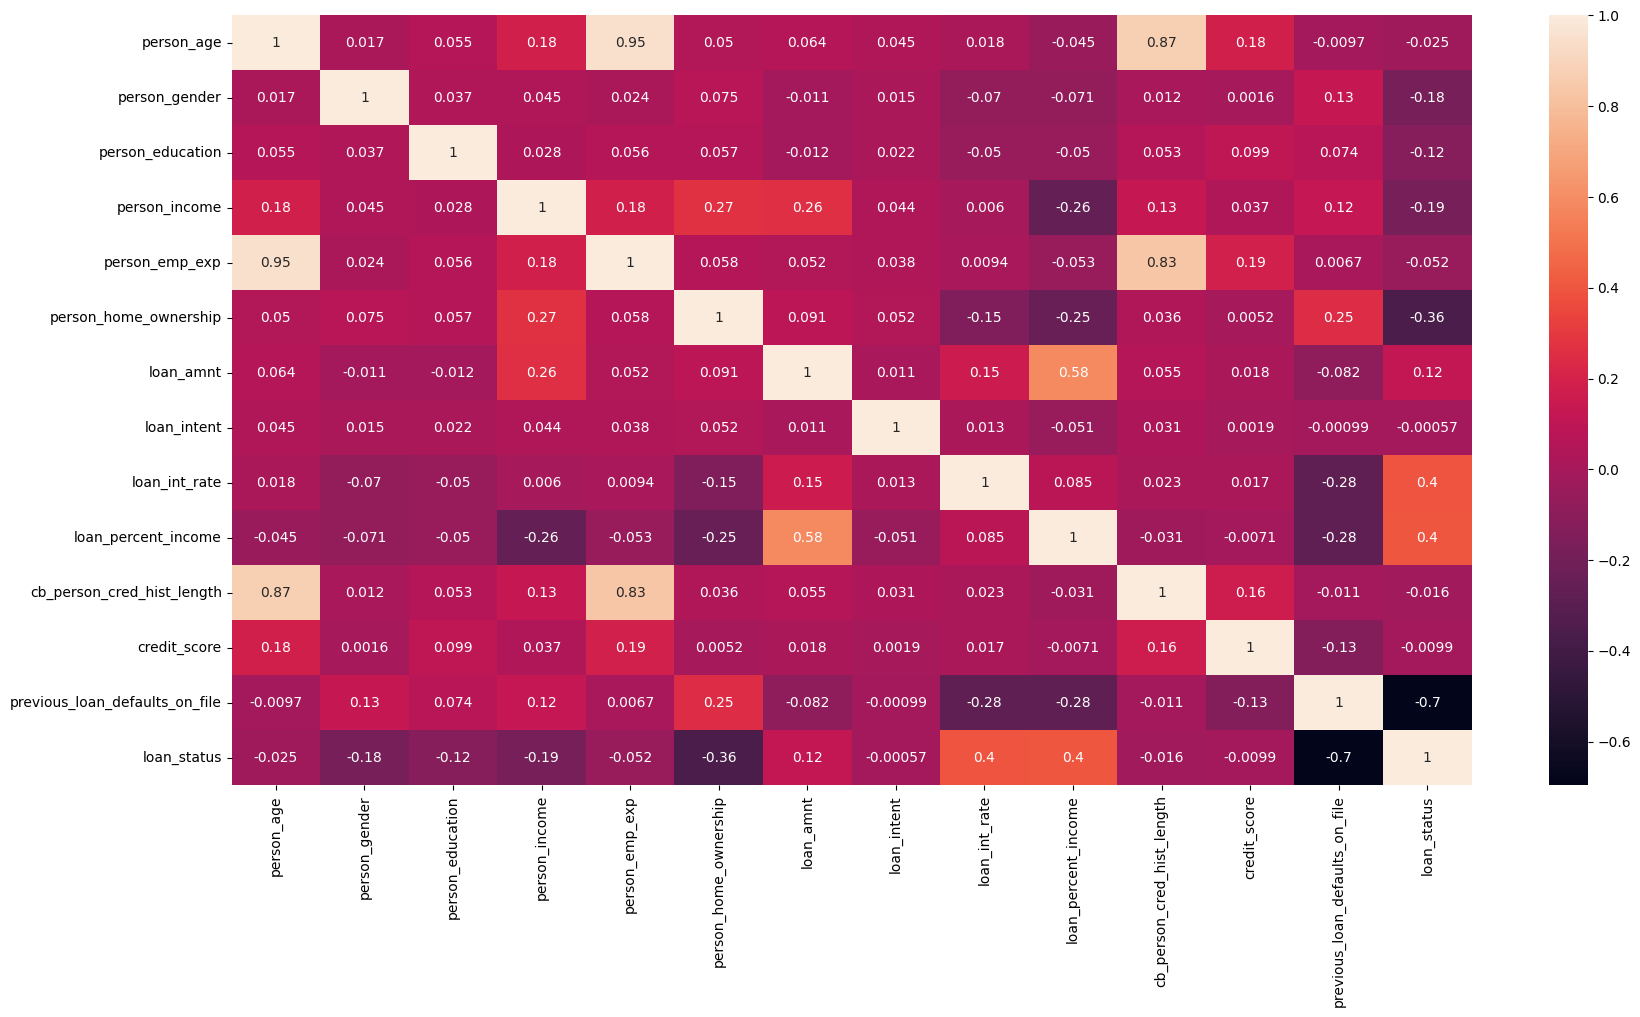

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(x,annot=True)

VIEW THE CORRELATION

In [ ]:
df.corr()['loan_status'].sort_values(ascending=False)

,loan_status
loan_status,1.000000
loan_percent_income,0.401891
loan_int_rate,0.396971
loan_amnt,0.117844
loan_intent,-0.000572
credit_score,-0.009851
cb_person_cred_hist_length,-0.016009
person_age,-0.025294
person_emp_exp,-0.051971
person_education,-0.124073


ONLY VIEW THE CORRELATION OF THE TARGET VARIABLE

In [ ]:
df.drop('person_emp_exp',axis='columns',inplace=True)
df.drop('cb_person_cred_hist_length',axis='columns',inplace=True)
df.drop('loan_amnt',axis='columns',inplace=True)
df.drop('person_income',axis='columns',inplace=True)
df.drop('credit_score',axis='columns',inplace=True)
df.drop('previous_loan_defaults_on_file',axis='columns',inplace=True)
df.drop('person_home_ownership',axis='columns',inplace=True)
df.drop('person_gender',axis='columns',inplace=True)
df.drop('person_education',axis='columns',inplace=True)
df.drop('person_age',axis='columns',inplace=True)



DROP THE COLUMNS

In [ ]:
df.columns

Index(['loan_intent', 'loan_int_rate', 'loan_percent_income', 'loan_status'], dtype='object')

# Feature Engeeniring

In [ ]:
x=df[['loan_intent', 'loan_int_rate', 'loan_percent_income']]#indepenent features
y=df['loan_status']#depend features(Target features)

SEPARATE OF INDEPENDENT FEATURE AND DEPEND FEATURE

In [ ]:
# # Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

# # Apply the scaler to the independent features
x_scaled = scaler.fit_transform(x)

In [ ]:
scaler_y = MinMaxScaler(feature_range=(0, 1))

y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

MinMax Scaling transforms your data into a specific range, typically between 0 and 1. This can be essential for machine learning algorithms, especially those that rely on distance or optimization methods (like gradient descent). Features with larger ranges could dominate the learning process and bias the model, while scaling ensures that all features are treated equally.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

train and split aand data

In [ ]:
x_train.shape

(56000, 3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
# Initialize and train the classifier
#model = LogisticRegression()
#model=SVC()
model=KNeighborsClassifier(n_neighbors=10)
#model=MultinomialNB()
#model=DecisionTreeClassifier()
#model=RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

# Predict on test set
y_pred = model.predict(x_test)

give model of the train and test

In [ ]:
print(accuracy_score(y_test, y_pred))

0.7774285714285715


print the accurate score score(0.78%)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print( classification_report(y_test, y_pred))

[[5841 1182]
 [1934 5043]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79      7023
           1       0.81      0.72      0.76      6977

    accuracy                           0.78     14000
   macro avg       0.78      0.78      0.78     14000
weighted avg       0.78      0.78      0.78     14000



print confusion_matrix and classification_report

In [ ]:
df.tail(10)

,loan_intent,loan_int_rate,loan_percent_income,loan_status
69990,5,12.263601,0.291836,1
69991,3,16.931830,0.300000,1
69992,4,10.097204,0.323502,1
69993,6,11.656183,0.170000,1
69994,2,14.779629,0.270000,1
69995,2,15.942949,0.430000,1
69996,5,11.134070,0.219772,1
69997,4,10.955597,0.340000,1
69998,3,14.868571,0.400000,1
69999,3,17.837754,0.089719,1


In [ ]:

df.head(10)

,loan_intent,loan_int_rate,loan_percent_income,loan_status
0,3,16.02,0.49,1
1,1,11.14,0.08,0
2,2,12.87,0.44,1
3,2,15.23,0.44,1
4,2,14.27,0.53,1
5,4,7.14,0.19,1
6,1,12.42,0.37,1
7,2,11.11,0.37,1
8,3,8.90,0.35,1
9,4,14.74,0.13,1


In [ ]:
df.tail(10)

,loan_intent,loan_int_rate,loan_percent_income,loan_status
69990,5,12.263601,0.291836,1
69991,3,16.931830,0.300000,1
69992,4,10.097204,0.323502,1
69993,6,11.656183,0.170000,1
69994,2,14.779629,0.270000,1
69995,2,15.942949,0.430000,1
69996,5,11.134070,0.219772,1
69997,4,10.955597,0.340000,1
69998,3,14.868571,0.400000,1
69999,3,17.837754,0.089719,1


see first 10 raws

In [ ]:

loan_intent=float(input('enter loan_intent :'))
loan_int_rate=float(input('enter loan_int_rate :'))
loan_percent_income=float(input('enter loan_percent_income'))



user_input=[[loan_intent,loan_int_rate,loan_percent_income]]
loan_status=model.predict(user_input)
print(f'The Predicted :{loan_status}')


enter loan_intent :1
enter loan_int_rate :11.14
enter loan_percent_income0.08	
The Predicted :[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Step 1: Initial Dataset Overview

Objectives

Understand the structure and contents of the dataset.
Determine the dataset's purpose, e.g., analyzing loan performance, predicting loan default probability, or identifying customer trends.

Actions

Inspect Columns: Review the headers and data types to understand the dataset fields.

Preview Data: Check the first few rows to assess completeness, consistency, and relevance.

Step 2: Exploratory Data Analysis (EDA)
Goals

Gain insights into the dataset's overall patterns.
Identify trends, relationships, and outliers in the data.

Tasks

Summary Statistics:

Mean, median, min, max for numeric columns (e.g., loan amounts, income levels).

Categorical Analysis:
Distribution of categories (e.g., loan types, approval statuses).

Visual Analysis:
Plot graphs such as histograms, box plots, scatterplots, and heatmaps.

Examples:
Loan amounts vs. repayment status.
Default rates by income or credit score.

Step 3: Data Cleaning

Goals

Prepare the dataset for meaningful analysis and modeling.
Tasks

Handle Missing Values:

Fill, remove, or impute missing data.

Correct Data Types:
Ensure numeric, categorical, and date columns are correctly formatted.

Remove Outliers:

Identify and handle extreme values if they skew the results.

Normalize and Encode:

Normalize numeric fields.
Encode categorical fields for analysis.


Step 4: Insights and Findings
Possible Insights

Default Probability:

Which demographic groups or income ranges have higher default rates?

Loan Approvals:
Analyze factors influencing approval (e.g., income, loan type, tenure).
using sample method in oversampling and using SMOTE() Function used the Oversampling method.

KNeighbour model are used in this Project.

Key Drivers:
Identify variables significantly impacting repayment or default.
Deliverables
Charts and visualizations summarizing trends.
Detailed insights in text format.


Step 5: Advanced Analysis (Optional)

Predictive Modeling
Build a machine learning model if applicable:
Use features like income, loan type, tenure, and repayment history to predict default risks or approval chances.

Evaluate using:
Accuracy, precision, recall, and F1 score.


Step 6: Documentation
Structure

Title Page
Project title, dataset name, date, and author details.
Abstract
A brief summary of objectives, approach, and key results.
Introduction
Background, dataset purpose, and goals.
Data Overview
Description of dataset fields and sample data.

Methodology

Steps for cleaning, analysis, and modeling.
Results
Key findings supported by charts and visuals.
Conclusion
Summary of insights and recommendations.
Appendices
Raw data samples, additional charts, or code snippets.
Action Plan

Step 1: Analyze the dataset structure and preview the data.

Step 2: Perform EDA to understand trends and key variables.

Step 3: Document each section with explanations, insights, and visuals.